<a href="https://colab.research.google.com/github/PravalikaMuthoju/STATISTICAL_ML_2024/blob/main/STAT_ML_ASS_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awarenessLinks to an external site.



Read the data with pandas and find features and target variables

Find target variable

Train SVM, KNN, Logistic regression and find accuracy

Reduce the dimension with PCA

Train SVM, KNN, Logistic regression and find **accuracY**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


data = pd.read_csv('/content/archive (21).zip')

data = data.dropna(subset=['Patient_Status'])
X = data[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']].copy()
y = data['Patient_Status']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC()
knn_model = KNeighborsClassifier()
logistic_model = LogisticRegression()

# Train and evaluate SVM
svm_model.fit(X_train_scaled, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_scaled))

# Train and evaluate KNN
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test_scaled))

# Train and evaluate Logistic Regression
logistic_model.fit(X_train_scaled, y_train)
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test_scaled))

print("Accuracies without PCA:")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"Logistic Regression Accuracy: {logistic_accuracy * 100:.2f}%")

# Apply PCA to reduce dimensions (using 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train and evaluate SVM with PCA
svm_model.fit(X_train_pca, y_train)
svm_accuracy_pca = accuracy_score(y_test, svm_model.predict(X_test_pca))

# Train and evaluate KNN with PCA
knn_model.fit(X_train_pca, y_train)
knn_accuracy_pca = accuracy_score(y_test, knn_model.predict(X_test_pca))

# Train and evaluate Logistic Regression with PCA
logistic_model.fit(X_train_pca, y_train)
logistic_accuracy_pca = accuracy_score(y_test, logistic_model.predict(X_test_pca))

print("\nAccuracies with PCA:")
print(f"SVM Accuracy with PCA: {svm_accuracy_pca * 100:.2f}%")
print(f"KNN Accuracy with PCA: {knn_accuracy_pca * 100:.2f}%")
print(f"Logistic Regression Accuracy with PCA: {logistic_accuracy_pca * 100:.2f}%")


Accuracies without PCA:
SVM Accuracy: 76.92%
KNN Accuracy: 69.23%
Logistic Regression Accuracy: 76.92%

Accuracies with PCA:
SVM Accuracy with PCA: 76.92%
KNN Accuracy with PCA: 72.31%
Logistic Regression Accuracy with PCA: 76.92%


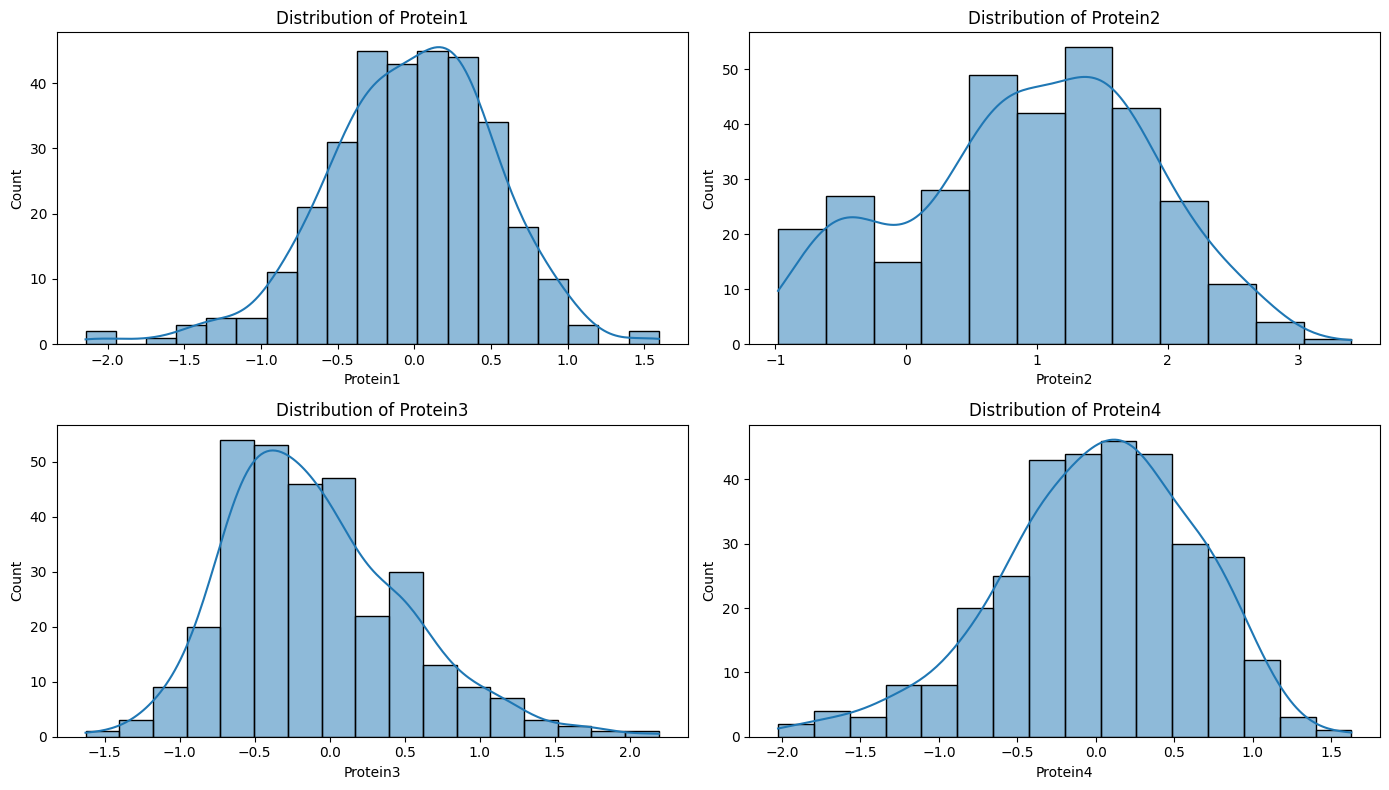

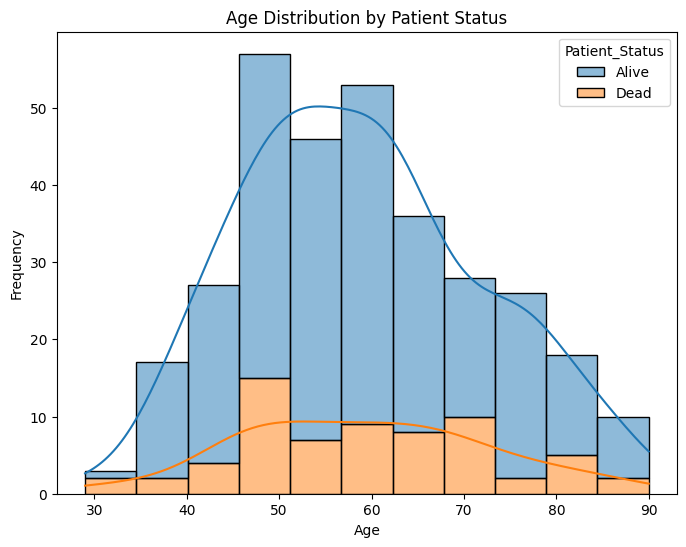

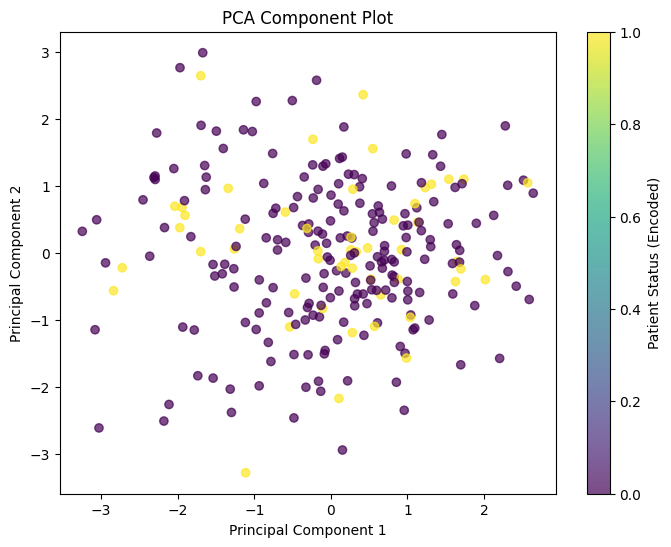

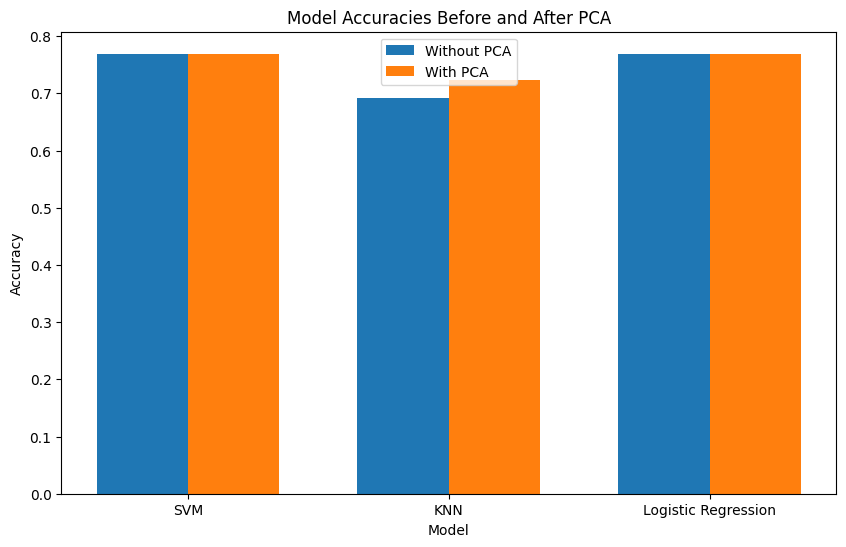

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Protein Levels
plt.figure(figsize=(14, 8))
for i, protein in enumerate(['Protein1', 'Protein2', 'Protein3', 'Protein4'], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data[protein], kde=True)
    plt.title(f'Distribution of {protein}')
plt.tight_layout()
plt.show()

# 2. Age Distribution by Patient Status
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Patient_Status', kde=True, multiple='stack')
plt.title('Age Distribution by Patient Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. PCA Component Plot (after PCA transformation)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Patient Status (Encoded)')
plt.title('PCA Component Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 4. Accuracy Comparison Plot
model_names = ['SVM', 'KNN', 'Logistic Regression']
accuracies = [svm_accuracy, knn_accuracy, logistic_accuracy]
accuracies_pca = [svm_accuracy_pca, knn_accuracy_pca, logistic_accuracy_pca]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(model_names))

# Plotting accuracies without PCA
plt.bar(index, accuracies, bar_width, label='Without PCA')
# Plotting accuracies with PCA
plt.bar([i + bar_width for i in index], accuracies_pca, bar_width, label='With PCA')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Before and After PCA')
plt.xticks([i + bar_width / 2 for i in index], model_names)
plt.legend()
plt.show()
